In [100]:
#CUSTOMER SEGMENTATION PROJECT
#BY BENSON KARANJA.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


**#Data collection and Analysis.******# 

In [101]:

df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [103]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [105]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [106]:
df.shape

(200, 5)

In [107]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

**RAW VISUALIZATION.**# 

Text(0, 0.5, 'Spending Score (1-100)')

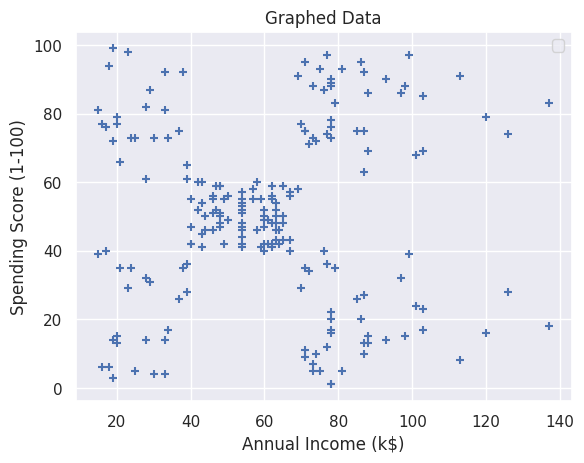

In [108]:

plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],marker='+')
plt.legend()
plt.title('Graphed Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

**CHOOSING THE CORRECT NO OF CLUSTERS.**# 

In [109]:
wcss=[]
for i in range(1,11):
    km=KMeans(
        n_clusters=i,
        init='k-means++',
        random_state=38
    )
    km.fit(x)
    wcss.append(km.inertia_)

Text(0, 0.5, 'wcss')

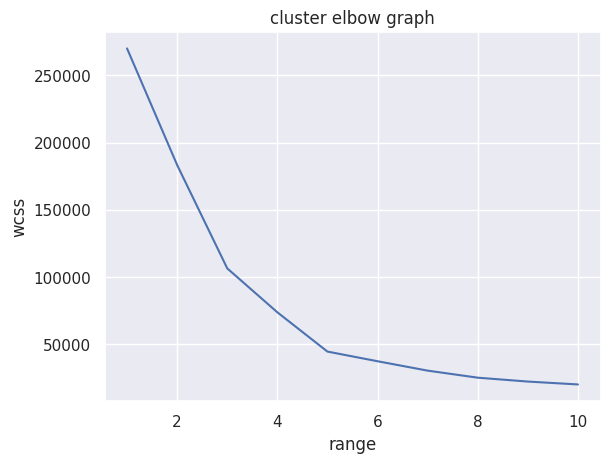

In [110]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('cluster elbow graph')
plt.xlabel('range')
plt.ylabel('wcss')

**5 CLUSTERS IS OPTIMUM.**

In [111]:
km=KMeans(n_clusters=5,random_state=38)
y=km.fit_predict(x)
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4,
       2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 0, 4, 0, 1, 0, 1, 0,
       4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [112]:
centers = km.cluster_centers_
centers


array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

**VISUALIZATION.**# 

In [113]:
x['clusters']=y
x

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,0
196,126,28,1
197,126,74,0
198,137,18,1


In [114]:
x_1 = x.loc[x['clusters'] == 0]
x_2 = x.loc[x['clusters'] == 1]
x_3 = x.loc[x['clusters'] == 2]
x_4 = x.loc[x['clusters'] == 3]
x_5 = x.loc[x['clusters'] == 4]
x_6 = x.loc[x['clusters'] == 5]

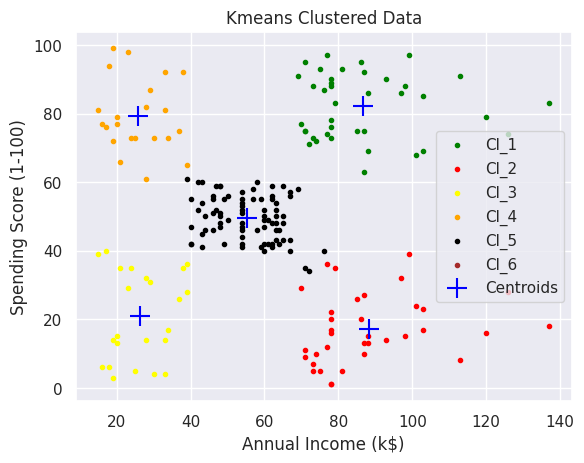

In [116]:
# Scatter plots for each cluster
plt.scatter(x_1['Annual Income (k$)'], x_1['Spending Score (1-100)'], marker='.', c='green', label='Cl_1')
plt.scatter(x_2['Annual Income (k$)'], x_2['Spending Score (1-100)'], marker='.', c='red', label='Cl_2')
plt.scatter(x_3['Annual Income (k$)'], x_3['Spending Score (1-100)'], marker='.', c='yellow', label='Cl_3')
plt.scatter(x_4['Annual Income (k$)'], x_4['Spending Score (1-100)'], marker='.', c='orange', label='Cl_4')
plt.scatter(x_5['Annual Income (k$)'], x_5['Spending Score (1-100)'], marker='.', c='black', label='Cl_5')
plt.scatter(x_6['Annual Income (k$)'], x_6['Spending Score (1-100)'], marker='.', c='brown', label='Cl_6')
plt.scatter(centers[:, 0], centers[:, 1], marker='+', c='blue', s=200, label='Centroids')
plt.title('Kmeans Clustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
